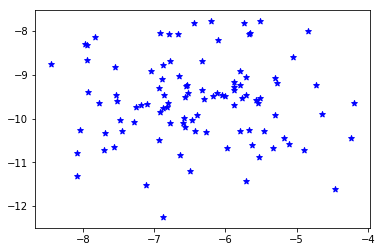

In [2]:
#导入必要的库
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
#生成分类数为1的数据集
data_stars = make_blobs(random_state=11,centers=1)
#将特征赋值给X
X_stars = data_stars[0]
#使用散点图进行可视化
plt.scatter(X_stars[:,0],X_stars[:,1],c='b',marker='*')
#显示图像
plt.show()

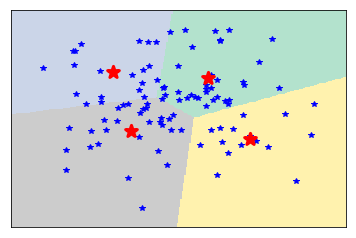

In [78]:
#导入KMeans工具
from sklearn.cluster import KMeans
#导入numpy
import numpy as np

#要求KMeans将数据聚为4类
kmeans = KMeans(n_clusters=4)
#拟合数据
kmeans.fit(X_stars)

#下面的代码是用来绘图的，这里我们不展开解释
x_min, x_max = X_stars[:, 0].min()-0.5 , X_stars[:, 0].max()+0.5 
y_min, y_max = X_stars[:, 1].min()-0.5 , X_stars[:, 1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), 
                     np.arange(y_min, y_max, .02))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2,
           aspect='auto', origin='lower')

plt.plot(X_stars[:, 0], X_stars[:, 1], 'r.', markersize=6,marker='*',c='b')
#用红色大星代表聚类的中心
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='*', s=150, linewidths=3,
            color='r', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
#显示图像
plt.show()

In [79]:
#打印KMeans进行聚类的标签
print("K均值的聚类标签:\n{}".format(kmeans.labels_))

K均值的聚类标签:
[0 3 3 1 3 3 3 3 1 0 1 2 0 3 0 0 1 3 1 1 0 0 3 1 3 0 0 0 2 3 2 0 1 1 1 3 0
 2 3 3 3 0 3 0 1 2 3 1 0 0 3 3 1 2 3 2 0 1 1 3 2 2 3 3 0 2 3 0 2 0 3 0 0 3
 0 0 0 0 2 0 0 0 2 2 2 0 3 0 1 3 0 1 3 1 1 0 0 0 2 1]


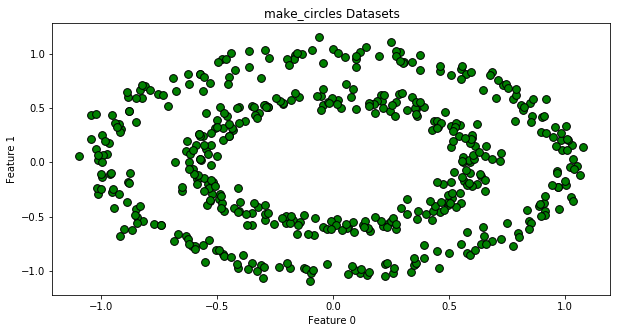

In [5]:
#导入scikit-learn库
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.colors

#创建Figure
fig=plt.figure(figsize=(10,5))
#生成圆环嵌套型数据集，样本数量为500
X_cir,y_cir=datasets.make_circles(n_samples=500,factor=.6,
                                  noise=0.05,random_state=42)
#绘制圆环嵌套图
plt.scatter(X_cir[:,0],X_cir[:,1],marker="o",c='g',s=60,edgecolor="k")
plt.title("make_circles Datasets")
#设置横、纵轴标签
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#显示图形
plt.show()

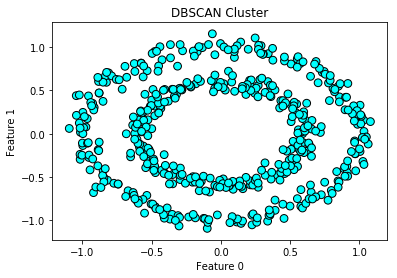

In [8]:
#导入DBSCAB
from sklearn.cluster import DBSCAN
#使用DBSCAN拟合数据，默认参数
db=DBSCAN()
cluster=db.fit_predict(X_cir)
#绘制圆环嵌套图
plt.scatter(X_cir[:,0],X_cir[:,1],marker="o",
                  c=cluster,s=60,edgecolor="k",cmap=plt.cm.cool)
plt.title("DBSCAN Cluster")
#设置横、纵轴标签
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#显示图形
plt.show()

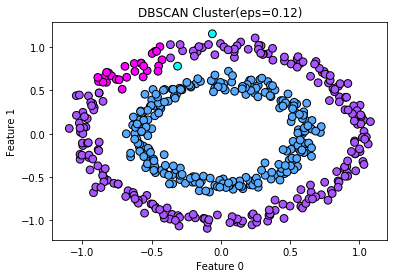

In [13]:
#导入DBSCAB
from sklearn.cluster import DBSCAN
#使用DBSCAN拟合数据，默认参数
db=DBSCAN(eps=0.12)
cluster_eps=db.fit_predict(X_cir)
#绘制圆环嵌套图
plt.scatter(X_cir[:,0],X_cir[:,1],marker="o",
                  c=cluster_eps,s=60,edgecolor="k",cmap=plt.cm.cool)
plt.title("DBSCAN Cluster(eps=0.12)")
#设置横、纵轴标签
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#显示图形
plt.show()

In [14]:
#打印聚类个数	
print('\n\n\nDBSCAN聚类(eps=0.12)的标签为：\n{}\n\n\n'.format(cluster_eps))




DBSCAN聚类(eps=0.12)的标签为：
[ 0  1  0  1  2  0  0  1  1  0  1  1  0  2  0  0  0  1  0  0  0  0  0  0
  1  0  0  1  2  0  0  0  0  1  1  0  0  1  1  1  0  2  0  1  1  1  1  1
  0  1  1  1  1  0  1  1  1  1  1  2  0  0  0  0  2  1  0  1  1  0  0  0
  0  0  0  0  0  1  0  0  1  2  0  1  0  2  1  0  0  0  0  0  0  0  0  0
  2  1  0  1  1  0  1  0  0  1  0  1  0  1  1  0  0  1  0  0  1  1  1  1
  1  1  0  1  1  1  0  1  1  0  1  1  0  0  1  1  1  1  1  0  1  1  0  2
  0  0  1  1  0  0  1  1  1  1  0  0  1  1  0  1  1  0  0  1  0  0  1  1
  0  1  1  1  0  1  1  1  0  1  1  0  0  1  0  0  0  1  0  1  1  1  0  0
  0  0  1  1  1  2  1  0  0  2  1  1  1  1  1 -1  0  0  0  1  0  0  0  0
  0  1  0  1  0  0  1  1  1  0  1  0  0  1  1  2  0  1  0  0  0  1  1  1
  0  1  0  1  0  2  2  1  0  1  0  0  0  1  0  0  1  0  1  0  0  1  0  2
  1  1  0  2  0  1  1  1  1  0  0  0  0  0  0  1  0  1  0  1  1  0  0  0
  0  0  0  0  0  0  1  1  0  0  0  0  0  1  0  1  1  1  0  1  1  1  0  1
  0  0  1  0  0  1  0  0

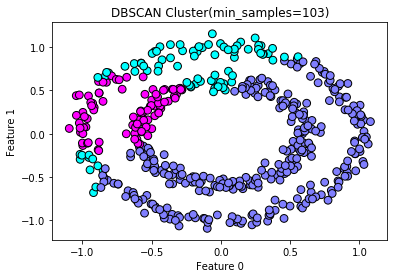

In [15]:
#导入DBSCAB
from sklearn.cluster import DBSCAN
#使用DBSCAN拟合数据，默认参数
db_1=DBSCAN(min_samples=103)
cluster_1=db_1.fit_predict(X_cir)
#绘制圆环嵌套图
plt.scatter(X_cir[:,0],X_cir[:,1],marker="o",
                  c=cluster_1,s=60,edgecolor="k",cmap=plt.cm.cool)
plt.title("DBSCAN Cluster(min_samples=103)")
#设置横、纵轴标签
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#显示图形
plt.show()

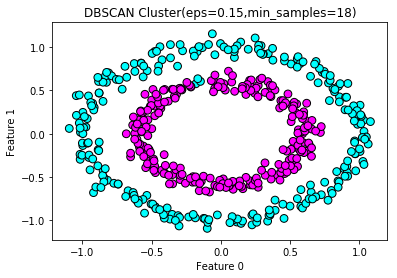

In [16]:
#导入DBSCAB
from sklearn.cluster import DBSCAN
#使用DBSCAN拟合数据，默认参数
db_2=DBSCAN(eps=0.15,min_samples=18)
cluster_2=db_2.fit_predict(X_cir)
#绘制圆环嵌套图
plt.scatter(X_cir[:,0],X_cir[:,1],marker="o",
                  c=cluster_2,s=60,edgecolor="k",cmap=plt.cm.cool)
plt.title("DBSCAN Cluster(eps=0.15,min_samples=18)")
#设置横、纵轴标签
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#显示图形
plt.show()